<a href="https://colab.research.google.com/github/YoneDelCastillo/Nonlinear-Maxwells-Eq.-FDTD/blob/main/TFG_2D_dispersi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#MODULOS DE PYTHON

#Librerías:
#Para cálculos y gráficas:
import numpy as np
import matplotlib.pyplot as plt
#Para la animación:
import matplotlib.animation as animation

In [27]:
#DEFINICION DE VARIABLES Y PARAMETROS

#Número de puntos espaciales
Lx = 1
dx = 0.025
Ly = 1
dy = 0.025

Nx = int(Lx/dx)+2
Ny = int(Ly/dy)+2

#Número de intervalos temporales
T = 1
dt = 0.0001

Nt = int(T/dt)

#Constantes
#τ_p
t_p = 0.001
# ε
e = 3
# ε_∞
e_i = 1.5
# μ
u = 1
#Δε_p
De = e - e_i

#Medio de Debye
#χ
def Chi(m,De,dt,t_p):
  chi = De*(1-np.exp(-dt/t_p))*np.exp(-m*dt/t_p)
  return chi
#ξ
def Xi(m,De,dt,t_p):
  xi = (De*t_p/dt)*(1-(dt/t_p+1)*np.exp(-dt/t_p))*np.exp(-m*dt/t_p)
  return xi
#Δχ_0
D_Chi_0 = Chi(0,De,dt,t_p)-Chi(1,De,dt,t_p)
#Δξ_0
D_Xi_0 = Xi(0,De,dt,t_p)-Xi(1,De,dt,t_p)
#α
a = (e_i-Xi(0,De,dt,t_p))/(e_i-Xi(0,De,dt,t_p)+Chi(0,De,dt,t_p))
#β
b = (dt/e)/(e_i-Xi(0,De,dt,t_p)+Chi(0,De,dt,t_p))
#γ
y = 1/(e_i-Xi(0,De,dt,t_p)+Chi(0,De,dt,t_p))

#Definicion de los campos
Ex = np.zeros((Ny,Nx,Nt))
Ey = np.zeros((Ny,Nx,Nt))
Hz = np.zeros((Ny,Nx,Nt))

Psi_x = np.zeros((Ny,Nx))
Psi_y = np.zeros((Ny,Nx))

#Condiciones iniciales
def Gauss(x,y,x0,y0,a,b,A):
  y = A*np.exp(-(x-x0)**2/(2*a**2)-(y-y0)**2/(2*b**2))
  return y

#Imponemos las condiciones iniciales a Ey y Hz
#Al mismo tiempo estamos imponiendo las condiciones de contorno de pozo de potencial infinito
for j in np.arange(1,Ny-1):
  for i in np.arange(1,Nx-1):
    #Ex[j,i,0] = Gauss(i*dx,j*dy,0.25*Lx,0.5*Ly,0.01,0.07,1)
    Ey[j,i,0] = Gauss(i*dx,j*dy,0.2*Lx     ,0.5*Ly     ,0.07,0.2,1)*np.cos((2*np.pi/(0.2*Lx))*i*dx)
    Hz[j,i,0] = Gauss(i*dx,j*dy,0.2*Lx-dx/2,0.5*Ly-dy/2,0.07,0.2,1)*np.cos((2*np.pi/(0.2*Lx))*i*dx)

geometria = False

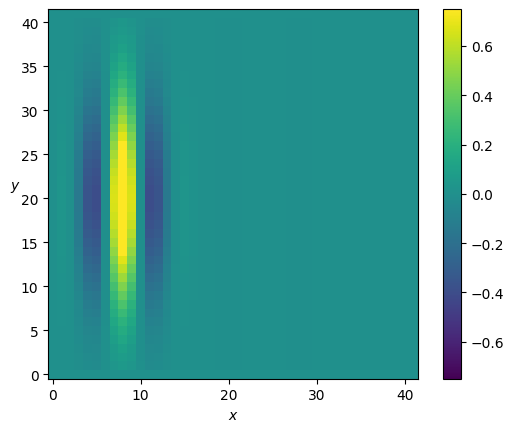

In [28]:
#Representación de la condición inicial
plt.imshow(Ey[:,:,0],vmin=-0.75,vmax=0.75,origin="lower")
plt.xlabel("$x$")
plt.ylabel("$y$",rotation=0)
plt.colorbar()


#plt.xlim(0,Nx-1)
#plt.ylim(0,Ny-1)


In [29]:
#ALGORITMO DE YEE

for n in np.arange(0,Nt-1):
  if n == int(0.25*Nt):
    print("25%")
  elif n == int(0.5*Nt):
    print("50%")
  elif n == int(0.75*Nt):
    print("75%")
  elif n == int(0.9*Nt):
    print("90%")
  elif n == Nt-2:
    print("100%")
  for j in np.arange(1,Ny-1):
    for i in np.arange(1,Nx-1):
      Ex[j,i,n+1] = a*Ex[j,i,n] + b*( Hz[j,i,n]-Hz[j-1,i,n])/dy + y*Psi_x[j,i]
      Ey[j,i,n+1] = a*Ey[j,i,n] - b*( Hz[j,i,n]-Hz[j,i-1,n])/dx + y*Psi_y[j,i]
      Hz[j,i,n+1] = Hz[j,i,n] - (dt/u)*((Ey[j,i+1,n]-Ey[j,i,n])/dx - (Ex[j+1,i,n]-Ex[j,i,n])/dy)
      Psi_x[j,i] = (D_Chi_0 - D_Xi_0)*Ex[j,i,n] + D_Xi_0*Ex[j,i,n+1] + Psi_x[j,i]*np.exp(-dt/t_p)
      Psi_y[j,i] = (D_Chi_0 - D_Xi_0)*Ey[j,i,n] + D_Xi_0*Ey[j,i,n+1] + Psi_y[j,i]*np.exp(-dt/t_p)


25%
50%
75%
90%
100%


In [ ]:
#ALGORITMO DE YEE

for n in np.arange(0,Nt-1):
  for j in np.arange(1,Ny-1):
    for i in np.arange(1,Nx-1):
      Ex[j,i,n+1] = a*Ex[j,i,n] + b*( Hz[j,i,n]-Hz[j-1,i,n])/dy + y*Psi_x[j,i]
      Ey[j,i,n+1] = a*Ey[j,i,n] - b*( Hz[j,i,n]-Hz[j,i-1,n])/dx + y*Psi_y[j,i]
      Hz[j,i,n+1] = Hz[j,i,n] - (dt/u)*((Ey[j,i+1,n]-Ey[j,i,n])/dx - (Ex[j+1,i,n]-Ex[j,i,n])/dy)
      Psi_x[j,i] = (D_Chi_0 - D_Xi_0)*Ex[j,i,n] + D_Xi_0*Ex[j,i,n+1] + Psi_x[j,i]*np.exp(-dt/t_p)
      Psi_y[j,i] = (D_Chi_0 - D_Xi_0)*Ey[j,i,n] + D_Xi_0*Ey[j,i,n+1] + Psi_y[j,i]*np.exp(-dt/t_p)


(0.0, 41.0)

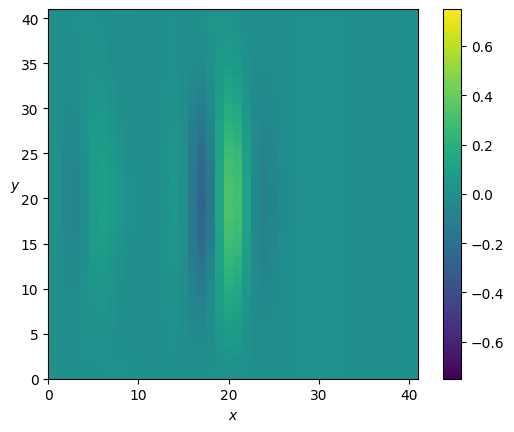

In [36]:
#Visualización provisional

t = int(0.95*Nt)
plt.imshow(Ey[:,:,t],vmin=-0.75,vmax=0.75,origin="lower")
plt.colorbar()

#plt.plot(x,y,"k-",linewidth=0.65)
plt.xlabel("$x$")
plt.ylabel("$y$",rotation=0)
#plt.title(f"Indice de refracción n = {n_i}")

plt.xlim(0,Nx-1)
plt.ylim(0,Ny-1)

In [37]:
#                       ANIMACIÓN

#Animación:
T_anim =  10   #seg
num_fps = 25
num_frames = T_anim*num_fps

Coef_prop = int(Nt/num_frames)

#Definimos una función que crea un frame de la animación
fig,ax = plt.subplots()

ims = []
interpol = "none"
for n in np.arange(0,num_frames):
    n=Coef_prop*n
    im = ax.imshow(Ey[:,:,n],interpolation = interpol,vmin=-0.75,vmax=0.75,animated = True,origin="lower")
    plt.xlabel("$x$")
    plt.ylabel("$y$",rotation=0)
    plt.title("Campo Electromagnético")
    #plt.xlim(0,Nx-1)
    #plt.ylim(0,Ny-1)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=int(1/num_fps*1000), blit=True)
plt.close()

if Coef_prop < 1:
  print("La animación no puede ser tan larga. La duración máxima posible es de %i s"%(Nt/num_fps))

In [38]:
#Esta función de matplot guarda el Vídeo
campo = "Ey"

ani.save(f"{campo}_Disp_Interpol_{interpol}_Nx={Nx}_Ny={Ny}_T={T}.mp4")